In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import
from sklearn.metrics import roc_curve, auc

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [3]:
train_data=df.loc[0:400]
val_data=df.loc[400:700]

In [4]:
X=train_data[[0,1,2,3,4,5,6,7]].values
y=train_data[8].values
X_val=val_data[[0,1,2,3,4,5,6,7]].values
y_val=val_data[8].values
# y.reshape(-1,1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_predi=model.predict_proba(X_test)[:,1]


fpr,tpr,threshold=roc_curve(y_test,y_predi)
roc_auc=auc(fpr,tpr)

C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


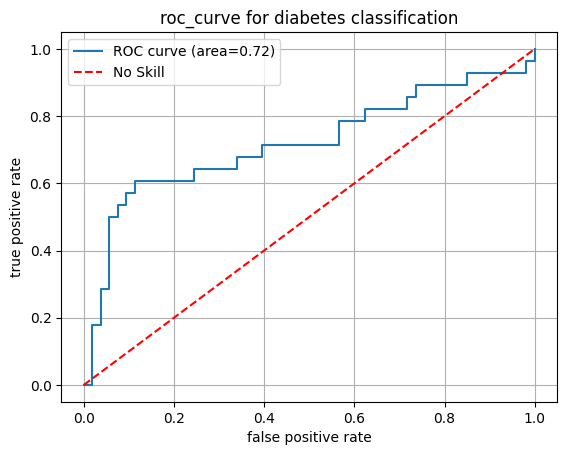

In [6]:
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'r--', label='No Skill')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve for diabetes classification')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
class classification:
    def __init__(self,lambda_=0.1,lr=0.001,epochs=1000,batch_size=50):
        self.lambda_=lambda_
        self.lr=lr
        self.epochs=epochs
        self.batch_size=batch_size
        self.weight=None
        self.bias=None
        self.loss_history=[]
    def _log_odds(self,X):
        return np.dot(X,self.weight) + self.bias
    def _sigmoid(self,z):
        z=np.clip(z,-500,500)
        return 1/(1 + np.exp(-z))
    def train(self,X,y,X_val,y_val):
        n_sample,n_feature=X.shape
        np.random.seed(42)
        self.weight=np.random.randn(n_feature)
        self.bias=np.random.randn()
        X=(X-X.mean())/X.std()+1e-8
        X_val=(X_val-X_val.mean())/X_val.std()
        for i in range(self.epochs):
            indeces=np.random.permutation(n_sample)
            X_shuffle=X[indeces]
            y_shuffle=y[indeces]
            for j in range(0,n_sample,self.batch_size):
                X_batch= X_shuffle[j:j+self.batch_size]
                y_batch=y_shuffle[j:j+self.batch_size]
                n_feature_s=len(X_batch)
                z=self._log_odds(X_batch)
                y_predict=self._sigmoid(z)
                
                error=y_predict - y_batch
                gradient_weight=(1/n_feature_s)*np.dot(X_batch.T,error)
                gradient_bias=(1/n_feature_s)*np.sum(error)

                gradient_weight += 2*self.weight * self.lambda_
                self.weight -= self.lr *  gradient_weight
                self.bias -= self.lr*gradient_bias
                loss=-np.mean(y_batch*np.log(y_predict) + (1 - y_batch)*np.log(1 - y_predict))
                
                self.loss_history.append(loss)
        
        val_z=np.dot(X_val,self.weight) + self.bias
        y_predict_va=1/(1 + np.exp(-val_z))
                

        fpr,tpr,threshold=roc_curve(y_val,y_predict_va)
        roc_auc=auc(fpr,tpr)
        print(f'roc_auc is {roc_auc}')
                
        plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'% roc_auc)
        plt.plot([0,1],[0,1],'r--', label='No Skill')
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('roc_curve for diabetes classification')
        plt.legend()
        plt.grid(True)
        plt.show()

roc_auc is 0.7772418910324359


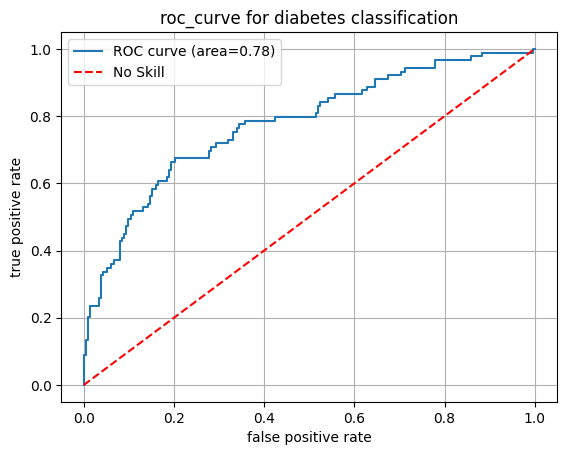

In [8]:
dianah=classification()
dianah.train(X,y,X_val,y_val)